In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv('Book1.csv')
df

,Date,1,2,3,4,5,6,7,8,9,...,7723955,30369354,34703847,36200067,36671067,37052366,38834077,39168240,39379024,Grand Total
0,22-Mar,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92
1,23-Mar,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
2,24-Mar,208.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126
3,25-Mar,68.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
4,26-Mar,46.0,48.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3-Oct,NaN,47.0,NaN,NaN,26.0,28.0,74.0,NaN,25.0,...,NaN,30.0,NaN,67.0,39.0,28.0,27.0,116.0,34.0,42
1287,4-Oct,NaN,30.0,NaN,NaN,18.0,21.0,104.0,NaN,21.0,...,NaN,25.0,6.0,40.0,30.0,28.0,23.0,61.0,NaN,32
1288,5-Oct,NaN,30.0,NaN,NaN,17.0,20.0,75.0,NaN,18.0,...,NaN,24.0,NaN,37.0,29.0,23.0,20.0,67.0,NaN,31
1289,6-Oct,NaN,26.0,NaN,NaN,13.0,18.0,35.0,NaN,18.0,...,NaN,22.0,NaN,26.0,26.0,23.0,19.0,34.0,NaN,24


In [74]:
df['Date'] = pd.date_range(start='2017-03-22', periods= len(df), freq='D')

In [75]:
df.set_index('Date', inplace=True)

In [76]:
df

,1,2,3,4,5,6,7,8,9,10,...,7723955,30369354,34703847,36200067,36671067,37052366,38834077,39168240,39379024,Grand Total
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-22,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92
2017-03-23,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
2017-03-24,208.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126
2017-03-25,68.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
2017-03-26,46.0,48.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,NaN,47.0,NaN,NaN,26.0,28.0,74.0,NaN,25.0,NaN,...,NaN,30.0,NaN,67.0,39.0,28.0,27.0,116.0,34.0,42
2020-09-29,NaN,30.0,NaN,NaN,18.0,21.0,104.0,NaN,21.0,NaN,...,NaN,25.0,6.0,40.0,30.0,28.0,23.0,61.0,NaN,32
2020-09-30,NaN,30.0,NaN,NaN,17.0,20.0,75.0,NaN,18.0,NaN,...,NaN,24.0,NaN,37.0,29.0,23.0,20.0,67.0,NaN,31


In [77]:
missing_data = df.drop(columns=['Grand Total']).isna().mean()
stable_sensors = missing_data[missing_data<0.10].index.tolist()
print(f'stable sensors are {stable_sensors}')

stable sensors are ['2', '5', '6', '9', '12']


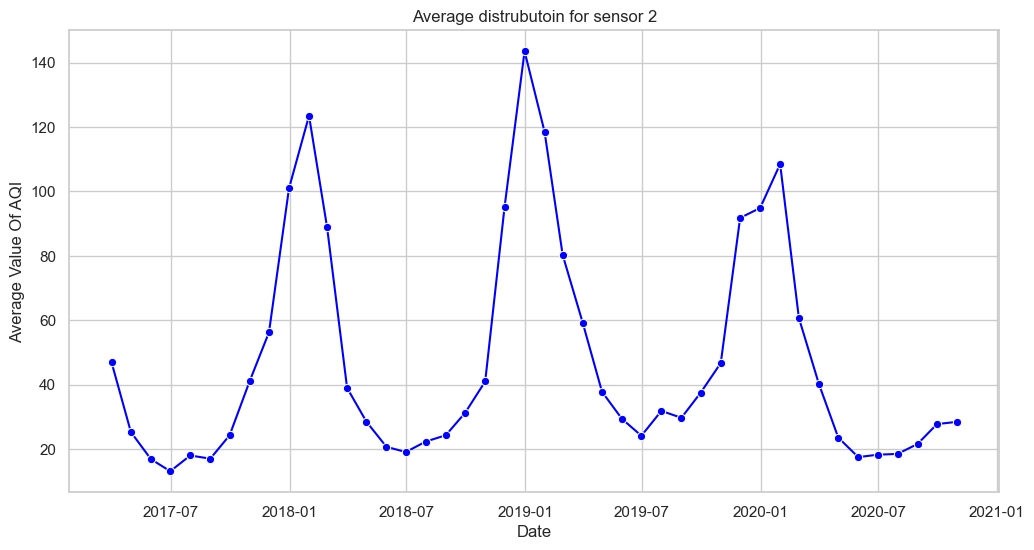

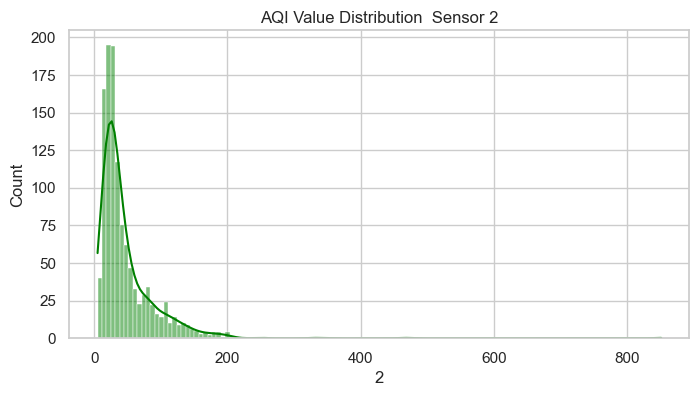

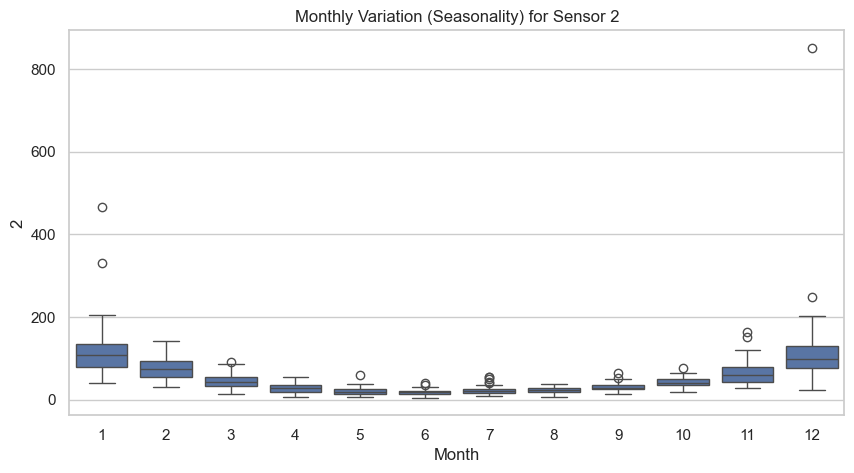

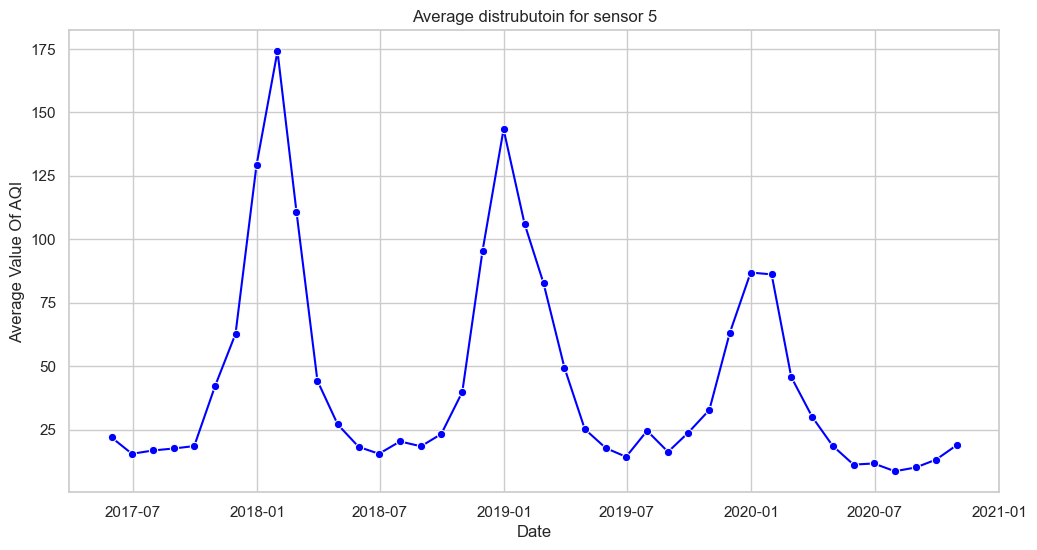

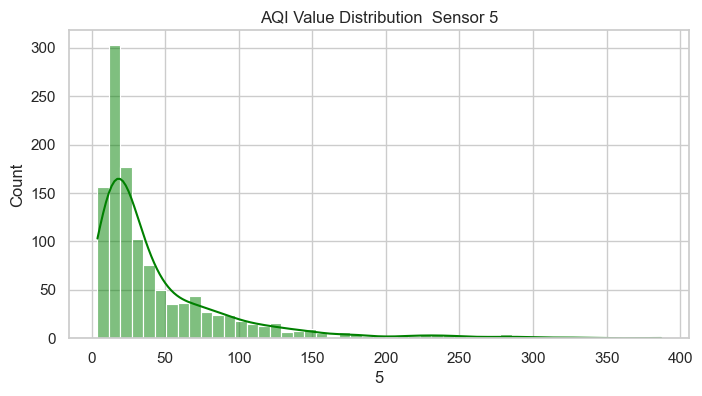

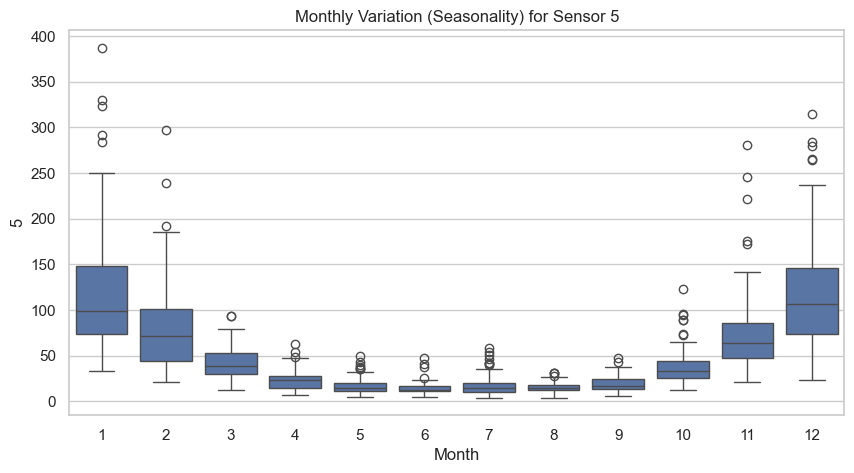

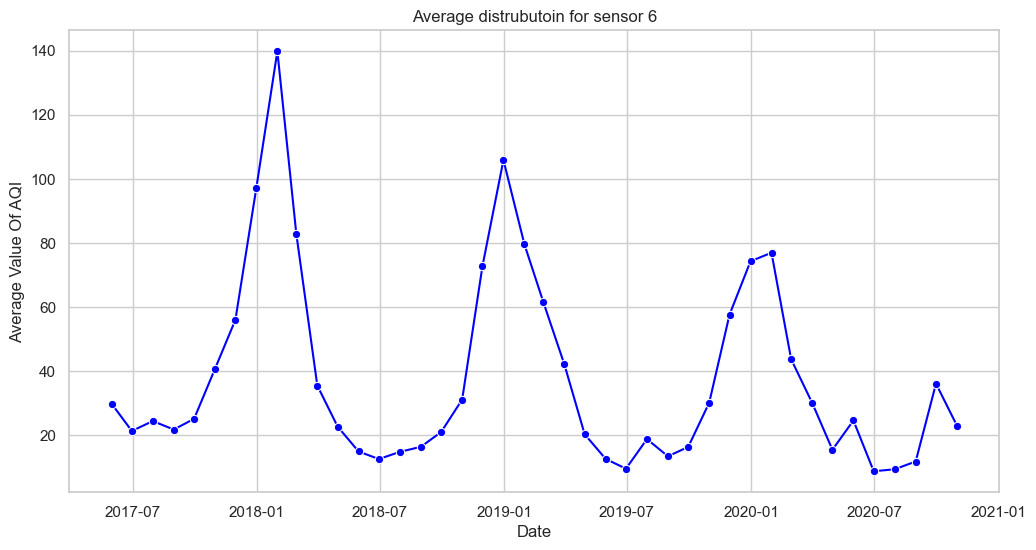

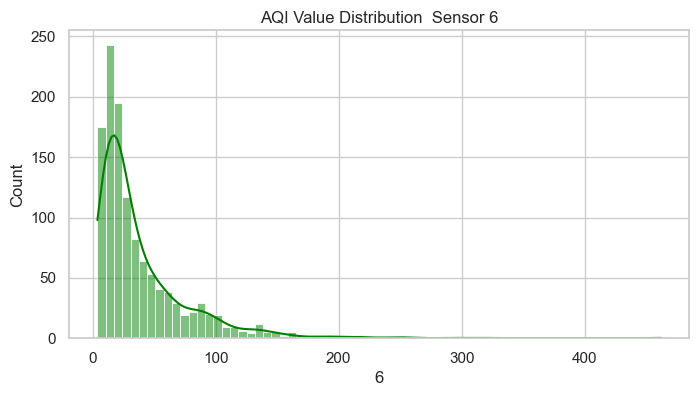

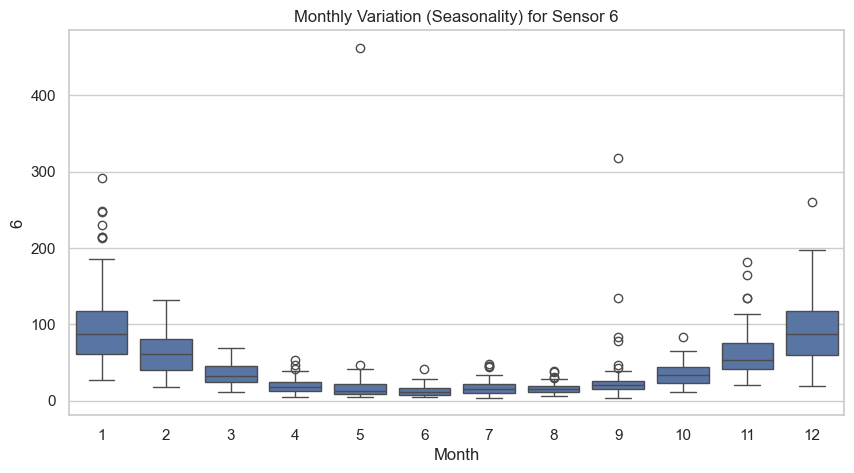

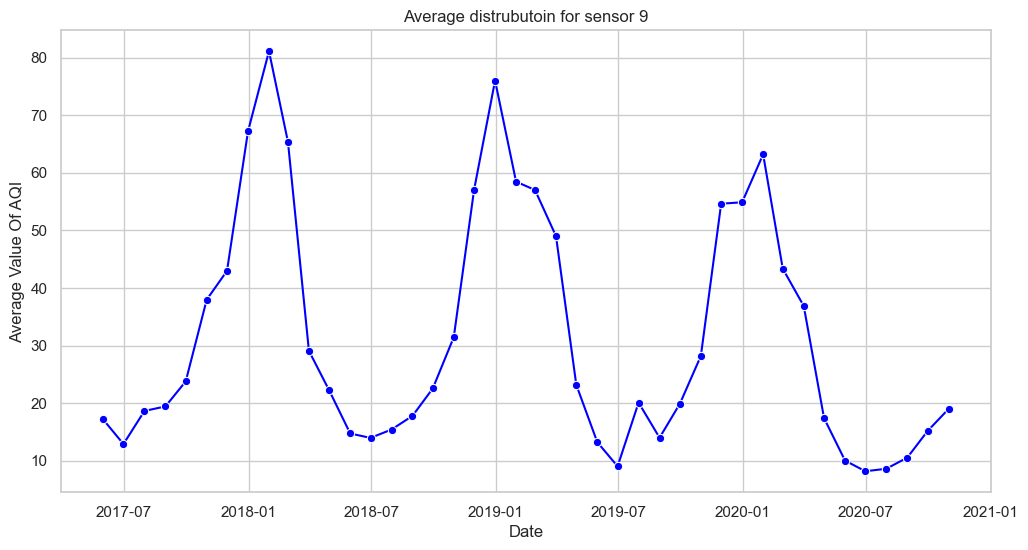

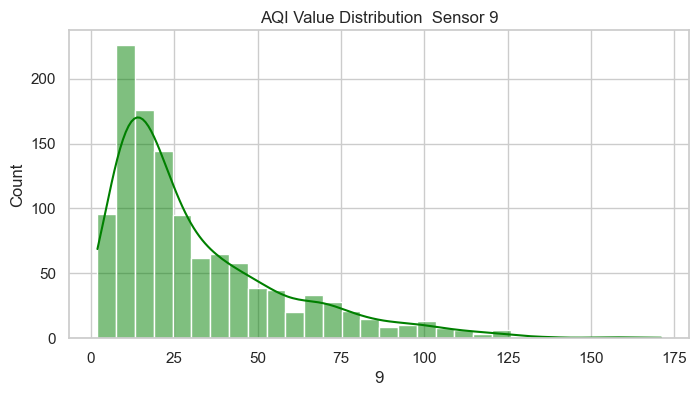

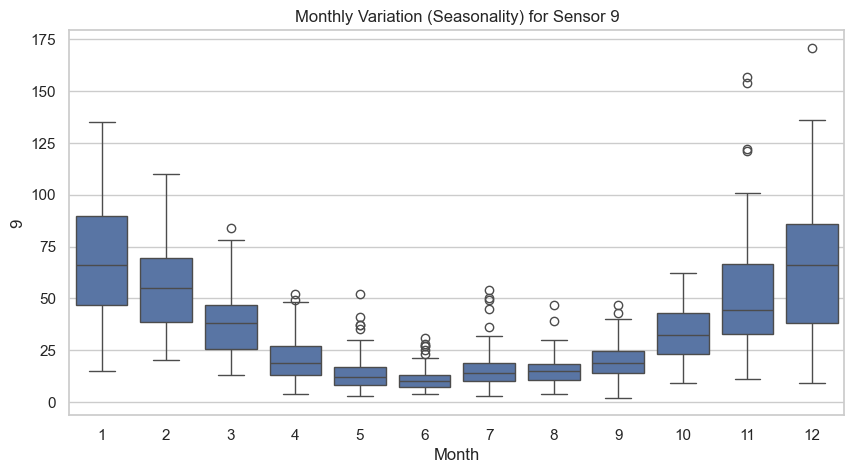

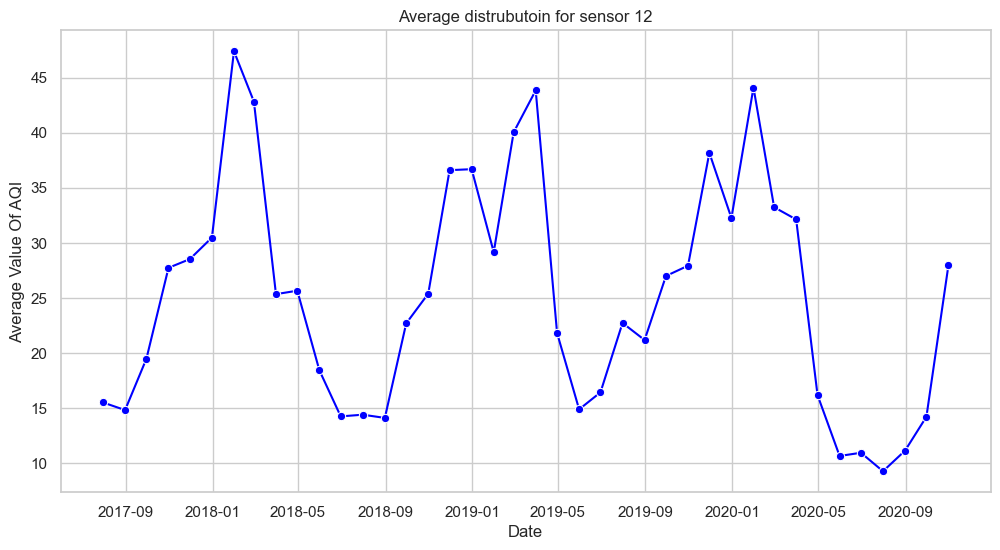

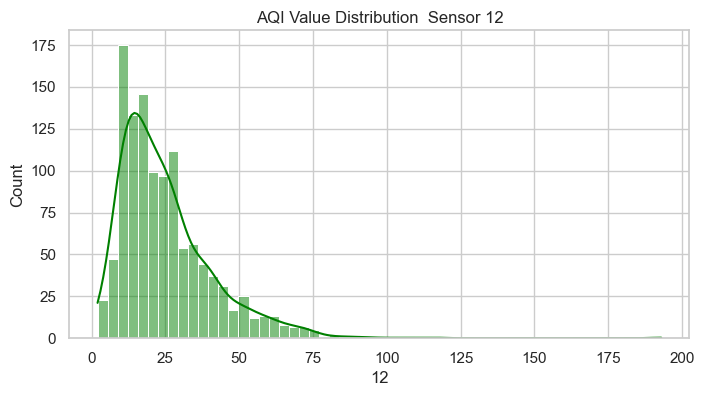

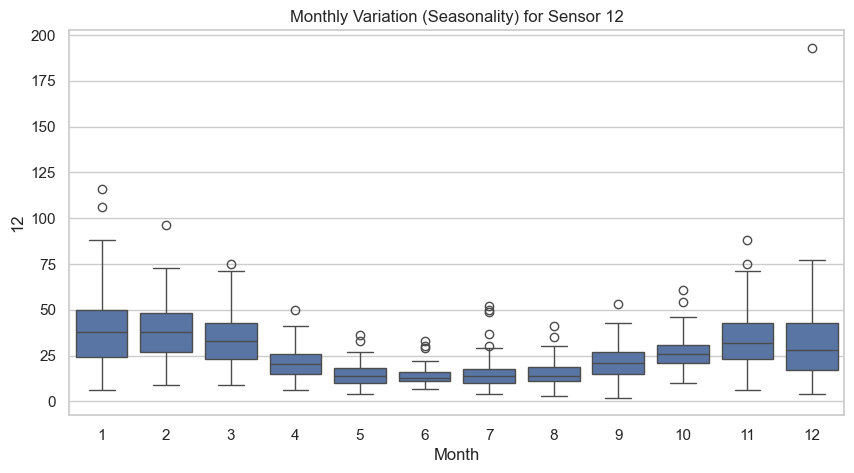

In [78]:
sns.set(style="whitegrid")
for sensor in stable_sensors:

    df_clean = df.dropna(subset=[sensor])
    df_resampled = df_clean[sensor].resample('ME').mean()


    '''monthly_aqi = df_clean.resample('ME').sum()

    plt.figure(figsize=(10, 6))
    plt.plot(monthly_aqi[sensor], c='red')
    plt.title("Monthly AQI")
    plt.xlabel("Date")
    plt.ylabel("AQI")'''


    plt.figure(figsize=(12, 6))
    # Plot the resampled data
    sns.lineplot(data=df_resampled, color='blue', marker='o')

    plt.title(f'Average distrubutoin for sensor {sensor}')
    plt.xlabel('Date')
    plt.ylabel('Average Value Of AQI')

    #distrubution 
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[sensor], kde=True, color='green')
    plt.title(f'AQI Value Distribution  Sensor {sensor}')

    #boxplot 
    temp_df = df_clean[[sensor]].copy()
    temp_df['Month'] = temp_df.index.month

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=temp_df, x='Month', y=sensor)
    plt.title(f'Monthly Variation (Seasonality) for Sensor {sensor}')

    plt.show()

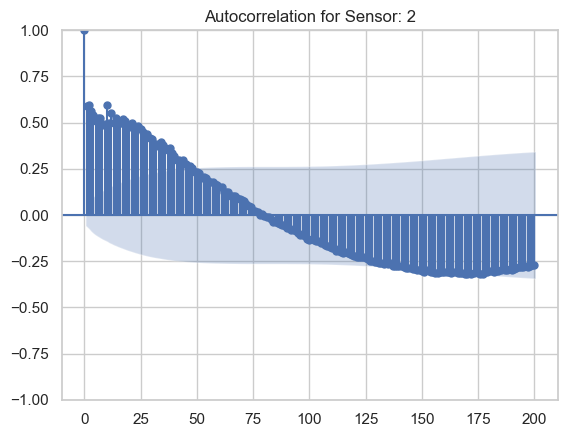

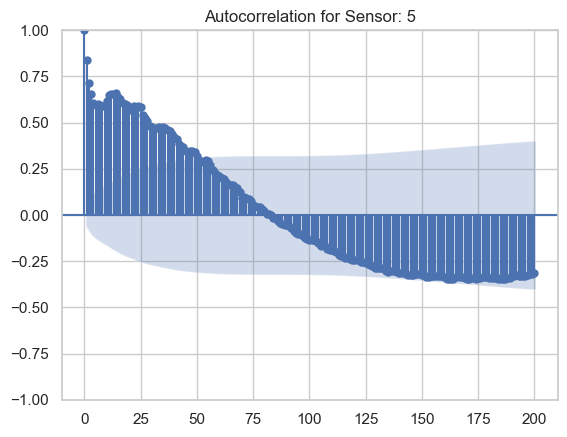

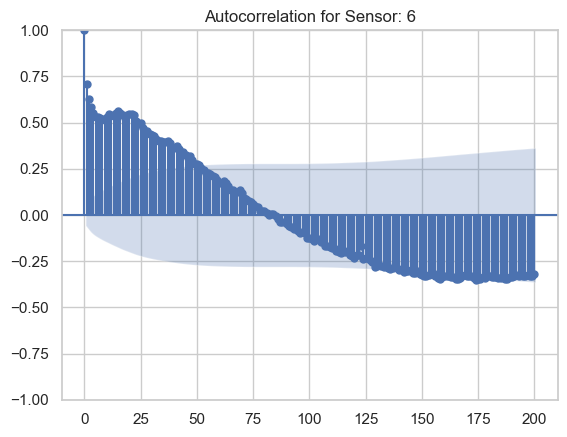

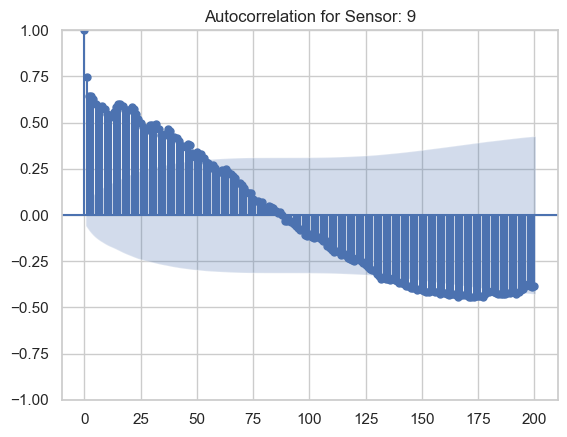

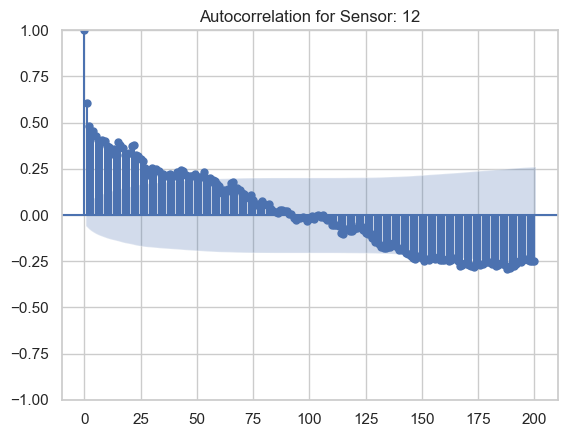

In [79]:
for sensor in stable_sensors:
    sensor_data = df[sensor].dropna()
    plot_acf(sensor_data, lags=200)
    plt.title(f"Autocorrelation for Sensor: {sensor}")
    plt.show()

## The ACF plot exhibits a sinusoidal decay, which indicates strong seasonal periodicity in the AQI levels. This suggests that the data does not just depend on the immediate past, but repeats a structural pattern over a specific cycle (e.g., annual or daily) and we can see at start we see it out of the blue so we can try q =1 


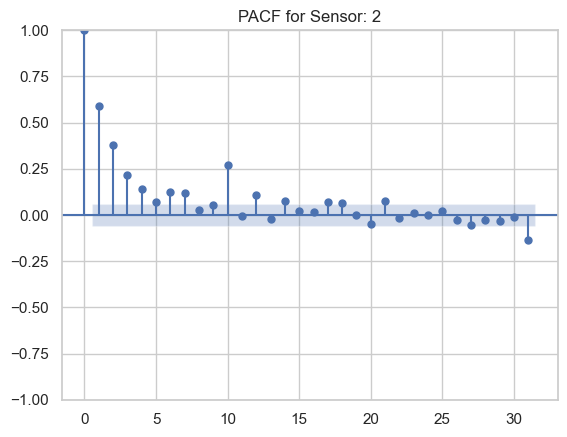

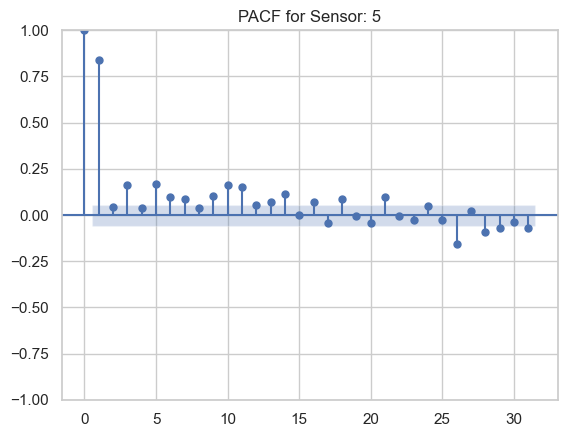

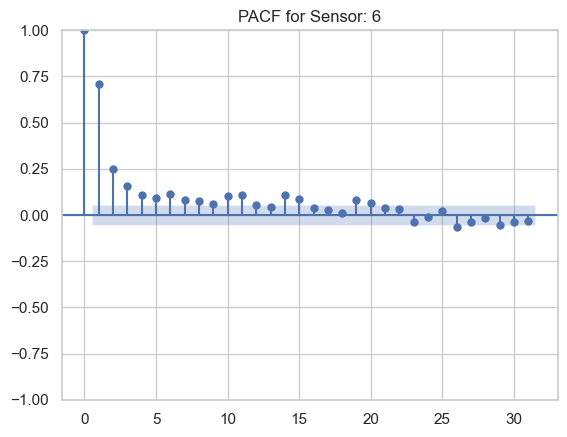

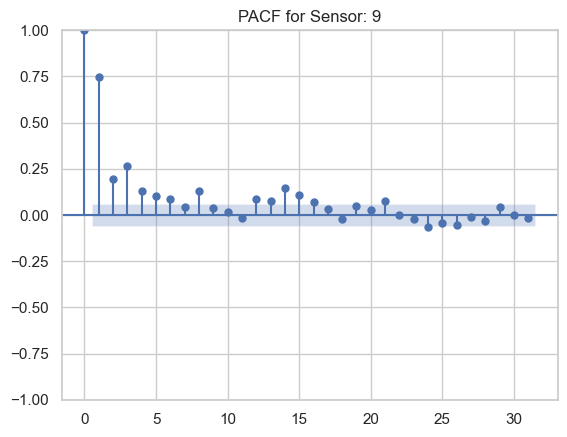

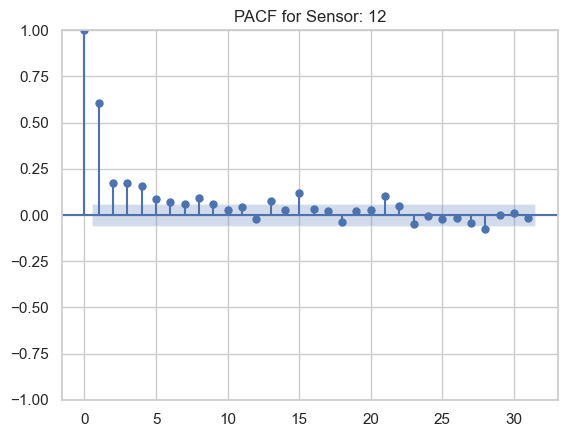

In [80]:
for sensor in stable_sensors:
    sensor_data = df[sensor].dropna()
    plot_pacf(sensor_data)
    plt.title(f"PACF for Sensor: {sensor}")
    plt.show()

## in this plots we can see "AR" (AutoRegressive) and based of plot we can start from lags 0, 1, 2

Auto-tuning for Sensor: 2
New best: SARIMA(0, 1, 0)x(0, 0, 0, 12) - MAPE: 84.62%
New best: SARIMA(0, 1, 0)x(0, 0, 1, 12) - MAPE: 58.68%
New best: SARIMA(0, 1, 0)x(0, 1, 1, 12) - MAPE: 43.13%
New best: SARIMA(0, 1, 0)x(1, 1, 0, 12) - MAPE: 37.56%
New best: SARIMA(0, 1, 1)x(1, 0, 1, 12) - MAPE: 26.79%

Tested 72 combinations

BEST MODEL:
Parameters: SARIMA(0, 1, 1)x(1, 0, 1, 12)
MAE:  9.31
RMSE: 10.84
MAPE: 26.79%


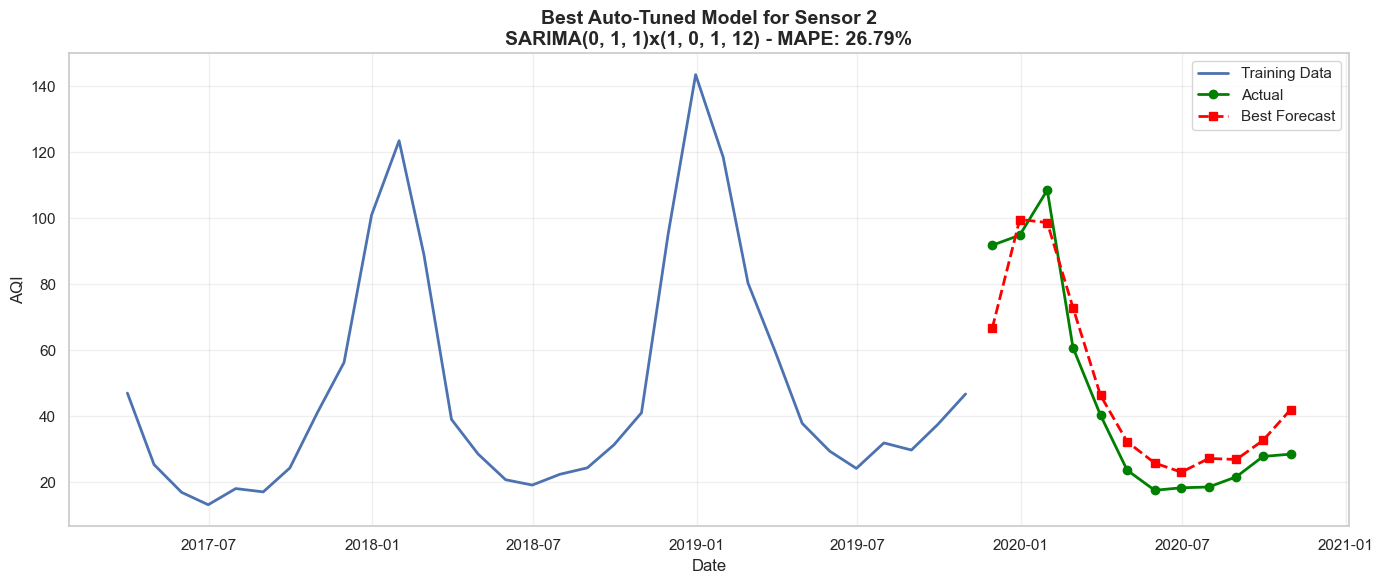

Auto-tuning for Sensor: 5
New best: SARIMA(0, 1, 0)x(0, 0, 0, 12) - MAPE: 115.27%
New best: SARIMA(0, 1, 0)x(0, 0, 1, 12) - MAPE: 78.94%
New best: SARIMA(0, 1, 0)x(0, 1, 0, 12) - MAPE: 36.61%
New best: SARIMA(0, 1, 0)x(1, 0, 1, 12) - MAPE: 32.79%

Tested 72 combinations

BEST MODEL:
Parameters: SARIMA(0, 1, 0)x(1, 0, 1, 12)
MAE:  9.58
RMSE: 13.66
MAPE: 32.79%


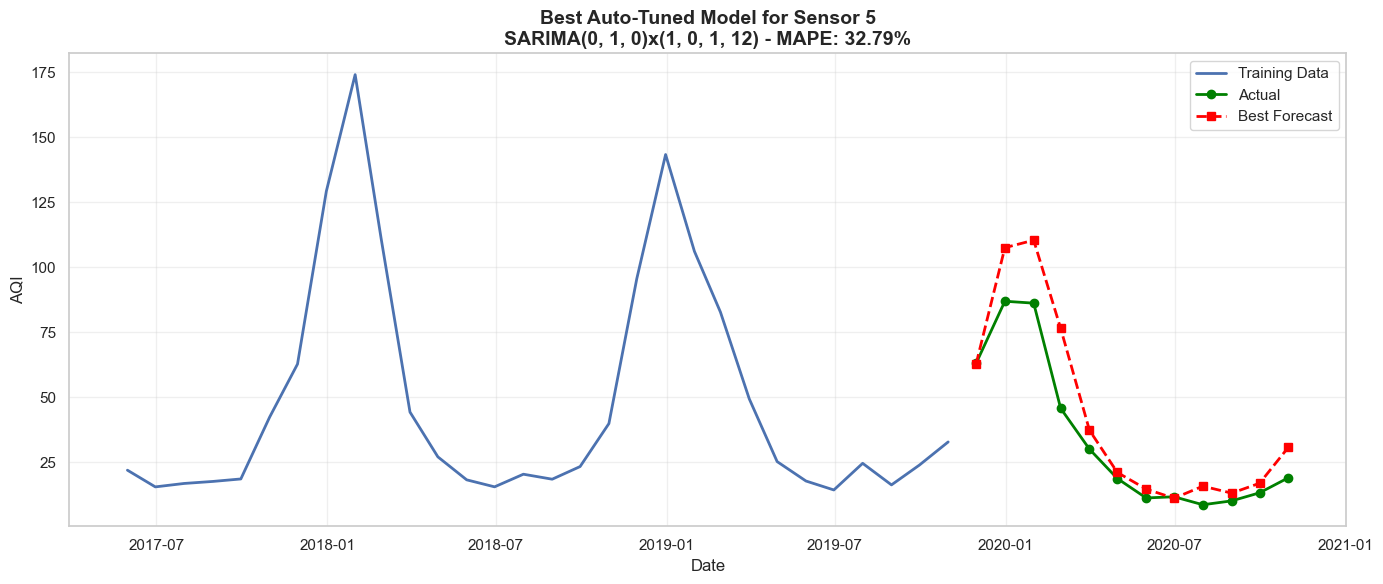

Auto-tuning for Sensor: 6
New best: SARIMA(0, 1, 0)x(0, 0, 0, 12) - MAPE: 81.93%
New best: SARIMA(0, 1, 0)x(0, 0, 1, 12) - MAPE: 66.29%
New best: SARIMA(0, 1, 0)x(0, 1, 0, 12) - MAPE: 33.52%
New best: SARIMA(0, 1, 0)x(0, 1, 1, 12) - MAPE: 32.71%
New best: SARIMA(0, 1, 0)x(1, 0, 1, 12) - MAPE: 23.46%

Tested 72 combinations

BEST MODEL:
Parameters: SARIMA(0, 1, 0)x(1, 0, 1, 12)
MAE:  6.39
RMSE: 8.36
MAPE: 23.46%


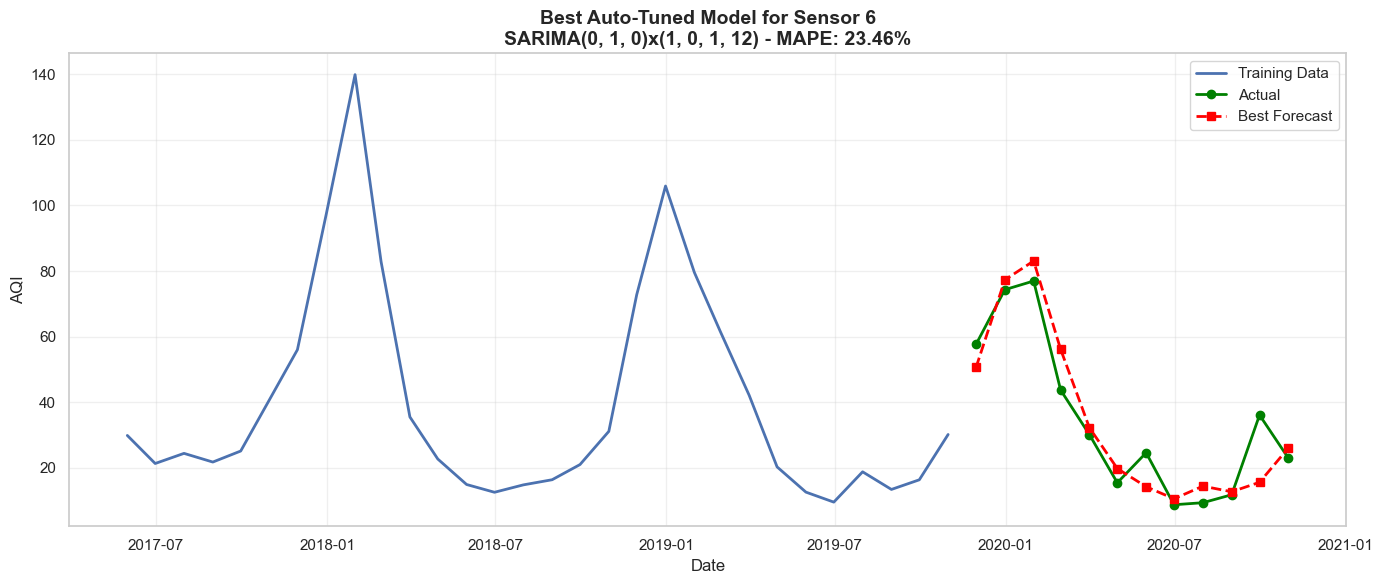

Auto-tuning for Sensor: 9
New best: SARIMA(0, 1, 0)x(0, 0, 0, 12) - MAPE: 102.30%
New best: SARIMA(0, 1, 0)x(0, 0, 1, 12) - MAPE: 79.53%
New best: SARIMA(0, 1, 0)x(0, 1, 0, 12) - MAPE: 23.13%
New best: SARIMA(0, 1, 0)x(0, 1, 1, 12) - MAPE: 18.62%
New best: SARIMA(1, 1, 0)x(0, 1, 1, 12) - MAPE: 17.16%

Tested 72 combinations

BEST MODEL:
Parameters: SARIMA(1, 1, 0)x(0, 1, 1, 12)
MAE:  4.39
RMSE: 6.09
MAPE: 17.16%


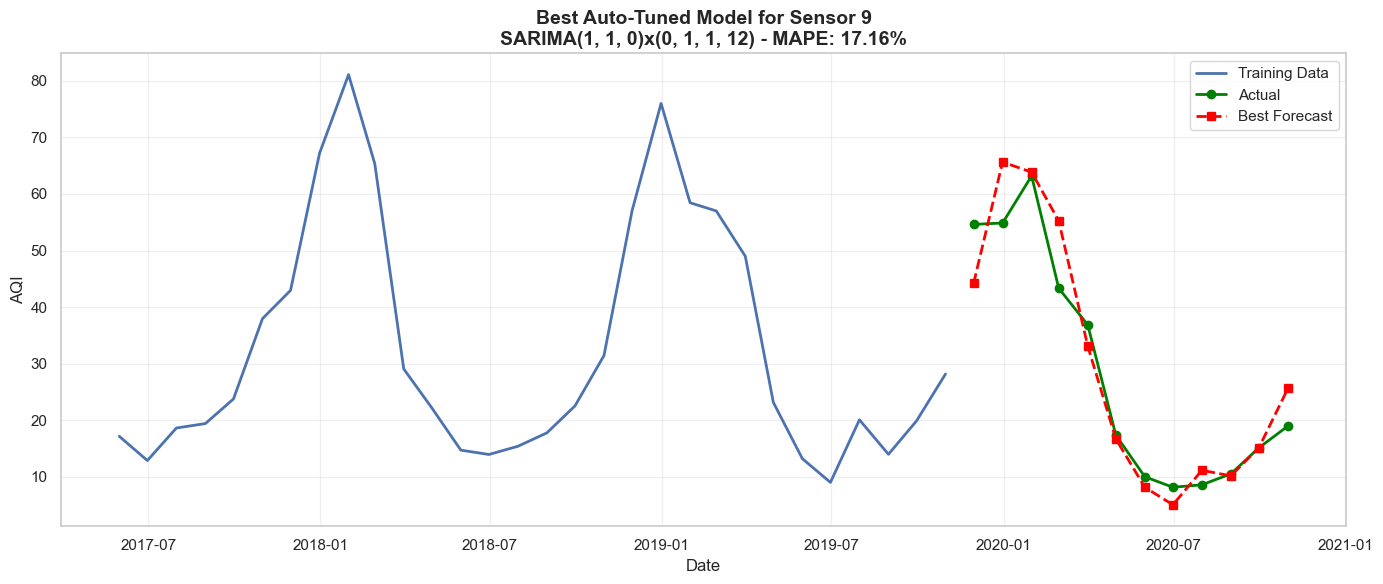

Auto-tuning for Sensor: 12
New best: SARIMA(0, 1, 0)x(0, 0, 0, 12) - MAPE: 78.51%
New best: SARIMA(0, 1, 0)x(0, 1, 0, 12) - MAPE: 59.38%
New best: SARIMA(0, 1, 0)x(0, 1, 1, 12) - MAPE: 43.03%
New best: SARIMA(0, 1, 0)x(1, 1, 0, 12) - MAPE: 34.50%
New best: SARIMA(0, 1, 0)x(1, 1, 1, 12) - MAPE: 34.16%

Tested 72 combinations

BEST MODEL:
Parameters: SARIMA(0, 1, 0)x(1, 1, 1, 12)
MAE:  5.70
RMSE: 6.51
MAPE: 34.16%


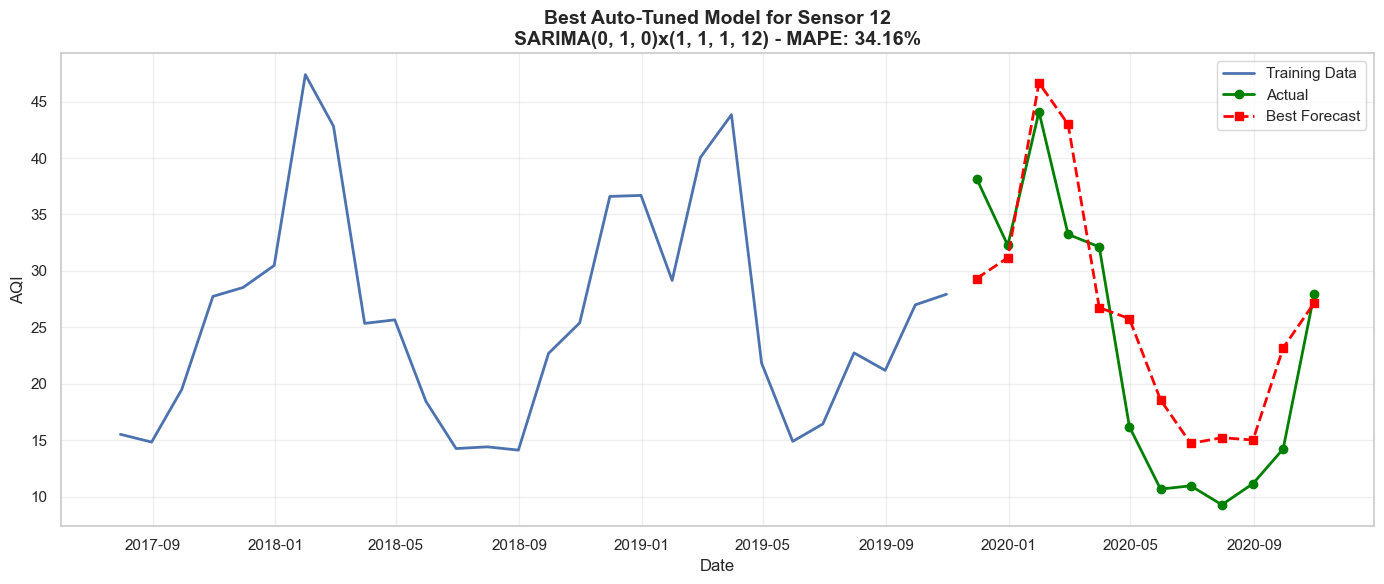

In [ ]:
def find_best_sarima(train_data, test_data, seasonal_period=12):
    best_mape = float('inf')
    best_params = None
    best_model = None
    
    # Parameter ranges
    p_values = [0, 1, 2]
    d_values = [1]
    q_values = [0, 1, 2]
    
    P_values = [0, 1]
    D_values = [0, 1]
    Q_values = [0, 1]
    
    #total_combinations = len(p_values) * len(q_values) * len(P_values) * len(D_values) * len(Q_values)
    #print(f"Testing {total_combinations} parameter combinations...\n")
    
    tested = 0
    
    for p in p_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        try:
                            tested += 1
                            model = SARIMAX(
                                train_data,
                                order=(p, 1, q),
                                seasonal_order=(P, D, Q, seasonal_period),
                                enforce_stationarity=True,
                                enforce_invertibility=True
                            )
                            
                            results = model.fit(disp=False)
                            forecast = results.get_forecast(steps=len(test_data))
                            prediction = forecast.predicted_mean
                            
                            mape = np.mean(np.abs((test_data - prediction) / (test_data + 1e-10))) * 100
                            
                            if mape < best_mape:
                                best_mape = mape
                                best_params = ((p, 1, q), (P, D, Q, seasonal_period))
                                best_model = results
                                print(f"New best: SARIMA{(p,1,q)}x{(P,D,Q,seasonal_period)} - MAPE: {mape:.2f}%")
                        
                        except:
                            continue
    
    print(f"\nTested {tested} combinations")
    return best_model, best_params, best_mape



for sensor in stable_sensors:
    print(f"Auto-tuning for Sensor: {sensor}")
    
    # Prepare data
    df_clean = df.dropna(subset=[sensor])
    #df_clean = df_clean[(df_clean[sensor] > 0) & (df_clean[sensor] < 2000)]
    df_resampled = df_clean[sensor].resample('ME').mean()
    data = df_resampled.interpolate(method='linear')#it will fill NaN data to mean t_i-1 and t_i+1
    

    train_data = data.iloc[:-12]
    test_data = data.iloc[-12:]
    
    best_model, best_params, best_mape = find_best_sarima(train_data, test_data)
    
    if best_model is not None:
        forecast = best_model.get_forecast(steps=12)
        prediction = forecast.predicted_mean
        prediction.index = test_data.index
        
        mae = mean_absolute_error(test_data, prediction)
        rmse = np.sqrt(mean_squared_error(test_data, prediction))
        
        print(f"\nBEST MODEL:")
        print(f"Parameters: SARIMA{best_params[0]}x{best_params[1]}")
        print(f"MAE:  {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAPE: {best_mape:.2f}%")
        
        # Plot
        plt.figure(figsize=(14, 6))
        plt.plot(train_data.index, train_data, label='Training Data', linewidth=2)
        plt.plot(test_data.index, test_data, label='Actual', color='green', linewidth=2, marker='o')
        plt.plot(prediction.index, prediction, label='Best Forecast', color='red', linewidth=2, linestyle='--', marker='s')
        
        plt.title(f'Best Auto-Tuned Model for Sensor {sensor}\nSARIMA{best_params[0]}x{best_params[1]} - MAPE: {best_mape:.2f}%', 
                 fontsize=14, fontweight='bold')
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('AQI', fontsize=12)
        plt.legend(loc='best')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("Could not find suitable model parameters")